# Intersection with ALKIS Data

<b>This Jupyter-Notebook is part of a master thesis with the topic:<br>
    <i>Analysis of deep learning methods for semantic segmentation of photogrammetric point clouds from aerial images</i><br>
&copy; Markus Hülsen, Matr.-Nr. 6026370<br>
Date: 27.06.2023</b>

Import necessary Librarys

In [1]:
%config Completer.use_jedi = False
from pathlib import Path
import geopandas as gpd
import pandas as pd
import numpy as np
import laspy
import os

### Read GeoJSON files
First we need to define the path where the data is stored.

In [2]:
# path where the data ist stored
data_path = 'ALKIS_Export/'

Now we want to generate a list with all geojson files inside this folder.

In [3]:
# save files that are in laz-format
geojson_files = []
for file in os.listdir(data_path):
    if file.endswith('.geojson'):
        geojson_files.append(data_path + file)
print(geojson_files)

['ALKIS_Export/AX_Platz.geojson', 'ALKIS_Export/AX_Strassenverkehr.geojson', 'ALKIS_Export/AX_Weg.geojson']


### Combine the geometries 
Import every GeoJSON file as a GeoPandas `GeoDataFrame` and combine all files.

CRS of geometry:  EPSG:25832


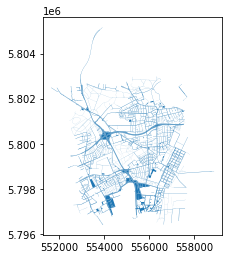

In [4]:
geometry_all = gpd.GeoDataFrame()

for geojson in geojson_files:
    gdf = gpd.read_file(geojson)
    gdf = gdf.set_crs('EPSG:25832', allow_override=True)
    geometry_all = pd.concat([geometry_all, gdf])

print('CRS of geometry: ', geometry_all.crs)
geometry_all.plot();

## Import Point-Cloud
Now import the pointcloud we want to intersect with the geometry. <br>
We will convert the pointcloud to a geopandars geometry directly.

Function to import las-file as pandas DataFrame.

In [5]:
def import_las_to_Dataframe(path):
    with laspy.open(path) as f:
        las = f.read()
    
    # read coordinates from las
    x = np.array(las.x)
    y = np.array(las.y)
    z = np.array(las.z)

    df = pd.DataFrame({'X':x,'Y':y,'Z':z},index=np.arange(len(x)))

    for i in range(3, len(las.point_format.dimensions)):
        dim = las.point_format.dimensions[i].name
        df[dim] = np.array(las[dim])
     
    return df

Get the las-files that are stored in the folder

In [6]:
# path where the data ist stored
data_path = '../../Daten/Datensatz_H3D/'
# sub-folder which includes different acquisition dates and types like 'DIM_2016', 'DIM_2019', 'DIM_2022', 'ALS2016', ...
data = 'DIM_2022/3 - clean_buildings'

# save files that are in laz-format
lst_files = []
for file in os.listdir(data_path + data):
    if file.endswith('.las'):
        lst_files.append(data_path + data + '/' + file)

lst_files = sorted(lst_files)
print('Found', len(lst_files),'las-files:')
print(lst_files)

Found 12 las-files:
['../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings//554000_5798000.las', '../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings//554000_5799000.las', '../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings//554000_5800000.las', '../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings//554000_5801000.las', '../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings//555000_5798000.las', '../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings//555000_5799000.las', '../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings//555000_5800000.las', '../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings//555000_5801000.las', '../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings//556000_5798000.las', '../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings//556000_5799000.las', '../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings//556000_5800000.las', '../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings//556000_5801000.las']


Import the las-file as DataFrame.

In [7]:
# path where the las-file is stored
las_path = lst_files[0]

df = import_las_to_Dataframe(las_path)
df

,X,Y,Z,intensity,return_number,number_of_returns,scan_direction_flag,edge_of_flight_line,classification,synthetic,...,scan_angle_rank,user_data,point_source_id,gps_time,red,green,blue,delta_z,z_to_dem,inside_road
0,554024.09,5798002.83,66.05,10442,0,7,0,0,2,0,...,-110,116,0,0.0,55040,54016,52224,0.188888,0.085888,0.0
1,554026.47,5798000.37,65.92,16696,0,2,0,0,2,0,...,126,200,0,0.0,42240,33280,27904,0.087113,-0.015887,0.0
2,554026.48,5798005.19,65.71,9527,0,2,0,0,2,0,...,123,123,0,0.0,9728,15616,19200,0.559579,0.456579,0.0
3,554026.66,5798005.76,65.80,9527,0,6,0,0,2,0,...,-116,113,0,0.0,6656,13056,15616,0.989986,0.886986,0.0
4,554049.63,5798046.24,64.24,10094,0,1,0,0,2,0,...,113,40,0,0.0,38144,36352,32000,-0.378887,-0.481887,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5631159,554999.26,5798835.98,84.83,7364,0,3,0,0,13,0,...,-110,138,0,0.0,16384,27392,20992,11.483861,11.379861,1.0
5631160,554989.94,5798860.83,83.46,7366,0,2,0,0,13,0,...,85,102,0,0.0,26880,38400,26112,9.923417,9.819417,1.0
5631161,554999.75,5798837.19,84.38,7366,0,2,0,0,13,0,...,-79,135,0,0.0,8960,15872,13312,10.909648,10.805648,1.0
5631162,554994.31,5798832.62,85.54,7361,0,3,0,0,13,0,...,104,97,0,0.0,14336,23296,18944,14.007186,13.903186,1.0


Drop the attribute `inside_road` if available.

In [8]:
df = df.drop('inside_road', axis = 1, errors='ignore')

Convert DataFrame to GeoDataFrame.

In [9]:
# build geometry from points
geometry = gpd.points_from_xy(df.X, df.Y, df.Z, crs='EPSG:25832')
geometry

<GeometryArray>
[<POINT Z (554024.09 5798002.83 66.05)>,
 <POINT Z (554026.47 5798000.37 65.92)>,
 <POINT Z (554026.48 5798005.19 65.71)>,
  <POINT Z (554026.66 5798005.76 65.8)>,
 <POINT Z (554049.63 5798046.24 64.24)>,
 <POINT Z (554050.06 5798045.62 64.23)>,
  <POINT Z (554025.9 5798004.96 65.85)>,
 <POINT Z (554026.43 5798006.81 65.23)>,
 <POINT Z (554025.83 5798004.92 66.03)>,
 <POINT Z (554024.71 5798006.45 65.39)>,
 ...
  <POINT Z (554996.7 5798833.16 86.63)>,
 <POINT Z (554997.44 5798834.47 86.78)>,
 <POINT Z (554991.89 5798800.37 74.56)>,
  <POINT Z (554996.9 5798836.94 84.65)>,
 <POINT Z (554998.77 5798803.03 83.09)>,
 <POINT Z (554999.26 5798835.98 84.83)>,
 <POINT Z (554989.94 5798860.83 83.46)>,
 <POINT Z (554999.75 5798837.19 84.38)>,
 <POINT Z (554994.31 5798832.62 85.54)>,
 <POINT Z (554999.39 5798831.57 85.94)>]
Length: 5631164, dtype: geometry

In [10]:
# build GeoDataFrame
gdf_pointcloud = gpd.GeoDataFrame(df, geometry=geometry)
gdf_pointcloud

,X,Y,Z,intensity,return_number,number_of_returns,scan_direction_flag,edge_of_flight_line,classification,synthetic,...,scan_angle_rank,user_data,point_source_id,gps_time,red,green,blue,delta_z,z_to_dem,geometry
0,554024.09,5798002.83,66.05,10442,0,7,0,0,2,0,...,-110,116,0,0.0,55040,54016,52224,0.188888,0.085888,POINT Z (554024.090 5798002.830 66.050)
1,554026.47,5798000.37,65.92,16696,0,2,0,0,2,0,...,126,200,0,0.0,42240,33280,27904,0.087113,-0.015887,POINT Z (554026.470 5798000.370 65.920)
2,554026.48,5798005.19,65.71,9527,0,2,0,0,2,0,...,123,123,0,0.0,9728,15616,19200,0.559579,0.456579,POINT Z (554026.480 5798005.190 65.710)
3,554026.66,5798005.76,65.80,9527,0,6,0,0,2,0,...,-116,113,0,0.0,6656,13056,15616,0.989986,0.886986,POINT Z (554026.660 5798005.760 65.800)
4,554049.63,5798046.24,64.24,10094,0,1,0,0,2,0,...,113,40,0,0.0,38144,36352,32000,-0.378887,-0.481887,POINT Z (554049.630 5798046.240 64.240)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5631159,554999.26,5798835.98,84.83,7364,0,3,0,0,13,0,...,-110,138,0,0.0,16384,27392,20992,11.483861,11.379861,POINT Z (554999.260 5798835.980 84.830)
5631160,554989.94,5798860.83,83.46,7366,0,2,0,0,13,0,...,85,102,0,0.0,26880,38400,26112,9.923417,9.819417,POINT Z (554989.940 5798860.830 83.460)
5631161,554999.75,5798837.19,84.38,7366,0,2,0,0,13,0,...,-79,135,0,0.0,8960,15872,13312,10.909648,10.805648,POINT Z (554999.750 5798837.190 84.380)
5631162,554994.31,5798832.62,85.54,7361,0,3,0,0,13,0,...,104,97,0,0.0,14336,23296,18944,14.007186,13.903186,POINT Z (554994.310 5798832.620 85.540)


## Intersection
Now we can process the intersection between the GeoDataFrame with the point cloud and the GeoDataFrame with the ALKIS-objects.<br>
For this purpose we use the `Spatial Join` from the GeoPandas Library. 

In [11]:
gdf_inner = gpd.sjoin(gdf_pointcloud, geometry_all, how='inner')
gdf_inner

,X,Y,Z,intensity,return_number,number_of_returns,scan_direction_flag,edge_of_flight_line,classification,synthetic,...,index_right,gml_id,identifier,beginnt,advStandardModell,anlass,AX_Datenerhebung,funktion,hatDirektUnten,zustand
28,554012.42,5798060.50,62.94,8754,0,2,0,0,2,0,...,203,DENIAL430000ehXu,urn:adv:oid:DENIAL430000ehXu,2019-06-27 09:50:54+00:00,DLKM,300900,4200.0,NaN,NaN,NaN
21030,554037.36,5798024.68,64.42,8930,0,5,0,0,2,0,...,203,DENIAL430000ehXu,urn:adv:oid:DENIAL430000ehXu,2019-06-27 09:50:54+00:00,DLKM,300900,4200.0,NaN,NaN,NaN
21035,554045.40,5798011.57,64.43,9239,0,6,0,0,2,0,...,203,DENIAL430000ehXu,urn:adv:oid:DENIAL430000ehXu,2019-06-27 09:50:54+00:00,DLKM,300900,4200.0,NaN,NaN,NaN
21058,554046.07,5798010.76,64.57,10481,0,2,0,0,2,0,...,203,DENIAL430000ehXu,urn:adv:oid:DENIAL430000ehXu,2019-06-27 09:50:54+00:00,DLKM,300900,4200.0,NaN,NaN,NaN
21067,554015.71,5798059.78,64.14,9516,0,5,0,0,2,0,...,203,DENIAL430000ehXu,urn:adv:oid:DENIAL430000ehXu,2019-06-27 09:50:54+00:00,DLKM,300900,4200.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5468881,554947.00,5798700.45,70.95,10140,0,2,0,0,13,0,...,204,DENIAL430000e3uP,urn:adv:oid:DENIAL430000e3uP,2013-01-29 06:32:51+00:00,DLKM,0,4200.0,NaN,NaN,NaN
5470383,554946.90,5798700.56,70.60,9076,0,2,0,0,13,0,...,204,DENIAL430000e3uP,urn:adv:oid:DENIAL430000e3uP,2013-01-29 06:32:51+00:00,DLKM,0,4200.0,NaN,NaN,NaN
5472612,554946.75,5798700.88,70.89,8350,0,2,0,0,13,0,...,204,DENIAL430000e3uP,urn:adv:oid:DENIAL430000e3uP,2013-01-29 06:32:51+00:00,DLKM,0,4200.0,NaN,NaN,NaN
5473356,554945.13,5798700.51,71.79,11470,0,7,0,0,13,0,...,204,DENIAL430000e3uP,urn:adv:oid:DENIAL430000e3uP,2013-01-29 06:32:51+00:00,DLKM,0,4200.0,NaN,NaN,NaN


Now we add a new attribute named `inside_road` which defines if a point is inside the geometry of the ALKIS objects.<br>
First the default value is zero for every point. <br>
For every point from the intersection we change the attribute `inside_road` to `1`.

In [12]:
gdf_pointcloud['inside_road'] = 0
gdf_pointcloud.loc[gdf_inner.index, 'inside_road'] = 1
gdf_pointcloud

,X,Y,Z,intensity,return_number,number_of_returns,scan_direction_flag,edge_of_flight_line,classification,synthetic,...,user_data,point_source_id,gps_time,red,green,blue,delta_z,z_to_dem,geometry,inside_road
0,554024.09,5798002.83,66.05,10442,0,7,0,0,2,0,...,116,0,0.0,55040,54016,52224,0.188888,0.085888,POINT Z (554024.090 5798002.830 66.050),0
1,554026.47,5798000.37,65.92,16696,0,2,0,0,2,0,...,200,0,0.0,42240,33280,27904,0.087113,-0.015887,POINT Z (554026.470 5798000.370 65.920),0
2,554026.48,5798005.19,65.71,9527,0,2,0,0,2,0,...,123,0,0.0,9728,15616,19200,0.559579,0.456579,POINT Z (554026.480 5798005.190 65.710),0
3,554026.66,5798005.76,65.80,9527,0,6,0,0,2,0,...,113,0,0.0,6656,13056,15616,0.989986,0.886986,POINT Z (554026.660 5798005.760 65.800),0
4,554049.63,5798046.24,64.24,10094,0,1,0,0,2,0,...,40,0,0.0,38144,36352,32000,-0.378887,-0.481887,POINT Z (554049.630 5798046.240 64.240),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5631159,554999.26,5798835.98,84.83,7364,0,3,0,0,13,0,...,138,0,0.0,16384,27392,20992,11.483861,11.379861,POINT Z (554999.260 5798835.980 84.830),1
5631160,554989.94,5798860.83,83.46,7366,0,2,0,0,13,0,...,102,0,0.0,26880,38400,26112,9.923417,9.819417,POINT Z (554989.940 5798860.830 83.460),1
5631161,554999.75,5798837.19,84.38,7366,0,2,0,0,13,0,...,135,0,0.0,8960,15872,13312,10.909648,10.805648,POINT Z (554999.750 5798837.190 84.380),1
5631162,554994.31,5798832.62,85.54,7361,0,3,0,0,13,0,...,97,0,0.0,14336,23296,18944,14.007186,13.903186,POINT Z (554994.310 5798832.620 85.540),1


## Save results to LAS-file

In [13]:
def save_df_to_las(df, path):
    
    header = laspy.LasHeader(point_format=3, version="1.2")
    
    atts = []
    for dim in header.point_format.dimensions:
        atts.append(dim.name)
    
    for dim in df.columns:
        if dim not in atts:
            header.add_extra_dim(laspy.ExtraBytesParams(name=dim, type=np.float32))
    
    las_new = laspy.LasData(header)

    las_new.x = df.X.to_numpy()
    las_new.y = df.Y.to_numpy()
    las_new.z = df.Z.to_numpy()
    
    for col in df.loc[:,'intensity':'inside_road'].columns:
        las_new[col] = df[col].to_numpy()
    
    las_new.write(path)
    print('LAS-file has been exported to', path)

Define export path

In [14]:
file = las_path.split('/')[-1]
file

'554000_5798000.las'

In [15]:
las_path

'../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings//554000_5798000.las'

In [16]:
file_path = data_path + data.replace('3 - clean_buildings', '4 - Intersection_with_ALKIS/') + file
file_path

'../../Daten/Datensatz_H3D/DIM_2022/4 - Intersection_with_ALKIS//554000_5798000.las'

In [17]:
save_df_to_las(gdf_pointcloud.drop('geometry', axis=1), las_path)

LAS-file has been exported to ../../Daten/Datensatz_H3D/DIM_2022/3 - clean_buildings//554000_5798000.las
